티머니 홈페이지(https://www.t-money.co.kr/) 에서 이용안내 선택 > 대중교통 통계자료 선택 > 최근 월간 교통카드 통계자료 게시글에서 엑셀 첨부 파일 다운로드합니다..
'버스정류장별 이용현황', '지하철 노서별 역별 이용현황', '지하철 유무임별 이용현황', '지하철 시간대별 이용현황' 4개의 탭 확인

1. 지하철 시간대별 이용 현황 데이터 시각화
2. 출근 시간대 (7시 ~9시) 가장 많이 타고 내리는 역 찾기
3. 밤 11시에 가장 많이 타는 역 찾기

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('./2019년_11월_교통카드_통계자료.xls', sheet_name='지하철 시간대별 이용현황', header=None).iloc[2:,3:]
# print(df.info())



# 데이터 로드
# df = pd.read_csv('/content/gdrive/My Drive/data/2019_11data.csv', encoding='cp949', header=None).iloc[2:, 3:]
df.set_index(df.iloc[:,0], inplace=True)
df.drop(df.columns[[0,-1]], axis=1, inplace=True)
df.columns = [['%s-%s'%((i+4)%24, (i+5)%24) for i in range(24) for _ in (0,1)], ['승차', '하차']*24]
df = df.applymap(lambda x: int(x.replace(',', '')))

df.head()

4-5        5-6          6-7           7-8            8-9          ...  \
        승차  하차     승차    하차     승차     하차     승차      하차     승차      하차  ...   
3                                                                        ...   
서울역   1019  26  11590  9390  14391  57182  42971  105213  87305  226780  ...   
시청      78   2   2305  4294   3912  23460   8160   65801  10751  203319  ...   
종각      99   0   4307  4647   4480  26687   7318   95355  12414  273124  ...   
종로3가   187  10   5307  2998   4617  14703   6657   27630  11028   79010  ...   
종로5가    39   0   2195  3809   3118  16262   5783   39965   9742  119740  ...   

       23-0          0-1       1-2      2-3    3-4     
         승차     하차    승차    하차  승차   하차  승차 하차  승차 하차  
3                                                      
서울역   34270  20872  3959  7479   2  416   0  0   0  0  
시청    14929   4414   917  1419   1   38   0  0   0  0  
종각    45860   5781  3847  1616   0   10   0  0   0  0  
종로3가  26081   6152  3031  2757   6   51   0  0   0  0  
종로5가  10796   3768   827  1119   0    4   0  0   0  0  

[5 rows x 48 columns]

In [3]:
# 컬럼 추가
df_sum = df.sum()
order = df_sum.index.get_level_values(0).unique()
df_sum = df_sum.unstack().reindex(order)
df_sum['승차 누적'] = df_sum['승차'].cumsum()
df_sum['하차 누적'] = df_sum['하차'].cumsum()
df_sum['합계 누적'] = df_sum['승차 누적'] - df_sum['하차 누적']

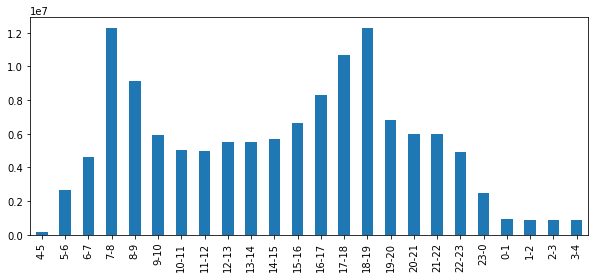

In [4]:
# 1: 지하철 시간대별 이용 현황 데이터 시각화
df_sum['합계 누적'].plot(figsize=(10,4), kind='bar')

In [5]:
# 2: (7~9)시에 가장 많이 타고 내리는 역 찾기
df[['7-8', '8-9']].sum(level=1 ,axis=1).idxmax()

승차    신림
하차    강남
dtype: object

In [6]:
# 3: 밤 11~12시에 가장 많이 타는 역 찾기
df['23-0']['승차'].idxmax()

'홍대입구'

In [14]:
import numpy as np
a = pd.DataFrame(np.random.randn(48, 48))

In [15]:
a

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.132744,-0.486942,-0.056497,1.919151,-0.895146,-1.848196,-1.112354,-0.330378,1.302564,0.573925,...,0.411241,-1.743676,1.077645,-1.358045,0.196504,1.416514,0.668411,0.267817,0.194751,-0.822332
1,-0.193889,-0.885055,-0.917422,2.741440,0.707324,0.603342,-0.612708,-2.519010,0.910342,1.140151,...,-0.010903,-1.042018,0.258077,0.816572,-0.767282,-0.429864,-0.911809,1.569896,0.461307,-0.020723
2,0.376365,-0.101548,1.370763,1.547362,0.687727,-0.057581,-0.236542,0.946648,0.369514,0.032357,...,-0.123114,0.298650,-1.348092,-0.917386,-2.364467,-0.997728,-1.282656,-0.433185,-0.187935,-2.456044
3,-0.176150,0.235819,-0.569114,-0.320273,-2.074139,1.091651,0.503951,-0.085387,0.125111,-2.612287,...,-1.327479,0.682705,0.584156,-0.705776,-1.218718,0.811247,1.421293,0.575524,0.319345,-0.385615
4,-1.456392,-0.800255,0.785044,-0.594639,0.210430,-0.461614,-0.320392,0.687137,-0.707598,0.300362,...,-0.115251,-1.434668,0.484792,-1.163405,-0.592550,0.090582,-0.005429,1.213018,0.261359,0.138398
5,1.399375,1.286089,0.042050,0.308891,0.474233,0.373469,-2.048117,0.458897,-0.969446,1.327203,...,-0.007648,0.755276,1.249376,0.755637,-1.448503,0.583501,-2.012841,-0.040459,-0.206234,-1.542477
6,0.459609,0.969293,0.066139,0.599986,0.000618,-1.119625,-0.288055,0.226008,0.342223,-0.786147,...,-0.118677,0.600526,-0.534929,1.276816,-0.936744,1.586037,-1.138079,0.492544,1.704917,-1.359092
7,-0.139391,-1.485520,1.159692,1.617244,-0.226419,-0.146573,0.200926,0.719927,-0.504880,-0.246472,...,-1.778080,0.590011,-1.974625,-1.705213,-1.371216,0.279344,-0.720386,0.058080,-0.044036,0.279334
8,0.817437,0.207227,0.480412,1.047216,-0.380641,1.267459,0.882169,0.402464,0.528294,-0.178457,...,-0.491756,0.916720,0.813305,-0.506628,-0.525869,0.679026,0.759030,1.109863,0.125627,1.533133
9,-0.587783,-0.413067,-1.107513,-0.137102,-0.053525,-0.515816,1.539407,-1.214258,0.155987,0.633884,...,0.295014,-0.740136,1.008742,-0.082809,-1.880838,-1.310574,-0.821894,0.955998,1.275426,-0.381446


In [16]:
a.columns = [['%s-%s'%((i+4)%24, (i+5)%24) for i in range(24) for _ in (0,1)], ['승차', '하차']*24]

In [31]:
['%s-%s'%((i+4)%24, (i+5)%24) for i in range(24) for _ in (0,1)]

['4-5',
 '4-5',
 '5-6',
 '5-6',
 '6-7',
 '6-7',
 '7-8',
 '7-8',
 '8-9',
 '8-9',
 '9-10',
 '9-10',
 '10-11',
 '10-11',
 '11-12',
 '11-12',
 '12-13',
 '12-13',
 '13-14',
 '13-14',
 '14-15',
 '14-15',
 '15-16',
 '15-16',
 '16-17',
 '16-17',
 '17-18',
 '17-18',
 '18-19',
 '18-19',
 '19-20',
 '19-20',
 '20-21',
 '20-21',
 '21-22',
 '21-22',
 '22-23',
 '22-23',
 '23-0',
 '23-0',
 '0-1',
 '0-1',
 '1-2',
 '1-2',
 '2-3',
 '2-3',
 '3-4',
 '3-4']